In [37]:
#imports
import add_label as al
import label_to_adncon as lta
import data_processing as dp
import linear_svc_fs as lsfs
import linear_svc_dir as lsd
import linear_svc_res as lsr
import linear_svc_tt as lst
import linear_svc_tdir as lstd
import linear_svc_tres as lstr
import tsne_plot_2 as tp2
import tsne_plot_3 as tp3
import pca_plot as pp
import AgeSex_plot as asp
import amcon_select as aas
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [33]:
#load gene expression data and covariates
CBE_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_CBE_geneCounts_normalized.tsv', sep='\t')
CBE_covariates = pd.read_csv('MayoRNAseq_RNAseq_CBE_covariates.csv')
TCX_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_TCX_geneCounts_normalized.tsv', sep='\t')
TCX_covariates = pd.read_csv('MayoRNAseq_RNAseq_TCX_covariates.csv')

In [4]:
#add labels to gene expression data for CBE
CBE = al.add_label(CBE_geneCounts, CBE_covariates, 0)

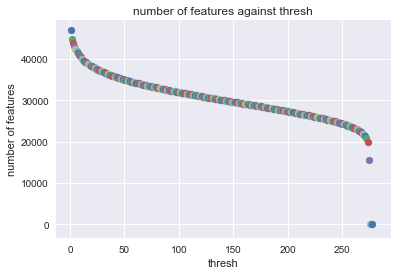

In [5]:
# plot of number of features against thresh for CBE
dp.data_processing(CBE)

In [34]:
#remove features with all zeros and constant values for CBE
df= CBE.replace(0,pd.np.nan)
df=df.dropna(axis=1, thresh = 273)
d1=df.replace(pd.np.nan,0)
d1.shape

CBE_covariates.rename(columns={CBE_covariates.columns[0]: "ID" }, inplace=True)
covar_index = CBE_covariates[['ID','Diagnosis']]
covar_index_T = covar_index.T
covar_index_T.drop('ID',axis=0,inplace=True)
df = covar_index_T.rename(columns = CBE_covariates['ID'])
dft = df.T

CBE = pd.concat([dft, d1], axis = 1)
CBE.shape

(278, 19950)

In [10]:
#add labels to gene expression data for TCX
TCX = al.add_label(TCX_geneCounts, TCX_covariates, 0)

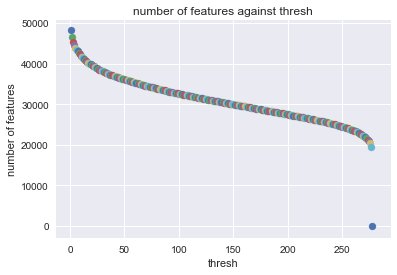

In [9]:
# plot of number of features against thresh for TCX
dp.data_processing(TCX)

In [35]:
#remove features with all zeros and constant values for CBE
df= TCX.replace(0,pd.np.nan)
df=df.dropna(axis=1, thresh = 276)
d2=df.replace(pd.np.nan,0)

TCX_covariates.rename(columns={TCX_covariates.columns[0]: "ID" }, inplace=True)
covar_index = TCX_covariates[['ID','Diagnosis']]
covar_index_T = covar_index.T
covar_index_T.drop('ID',axis=0,inplace=True)
df = covar_index_T.rename(columns = TCX_covariates['ID'])
dft = df.T

TCX = pd.concat([dft, d2], axis = 1)
TCX.shape

(278, 19379)

In [18]:
#selecting labels 'AD' and 'Control' and changing to 1 and 0 for CBE
CBE_x, CBE_y = lta.label_to_adncon(CBE)
CBEanc = pd.concat([CBE_y, CBE_x], axis=1)
CBEanc.shape

(159, 19950)

In [21]:
#selecting labels 'AD' and 'Control' and changing to 1 and 0 for TCX
TCX_x, TCX_y = lta.label_to_adncon(TCX)
TCXanc = pd.concat([TCX_y, TCX_x], axis=1)
TCXanc.shape

(160, 19379)


There are 2 unique target valuess: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.003s...
[t-SNE] Computed neighbors for 159 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 5558.437550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.919460
[t-SNE] Error after 1000 iterations: 0.231625


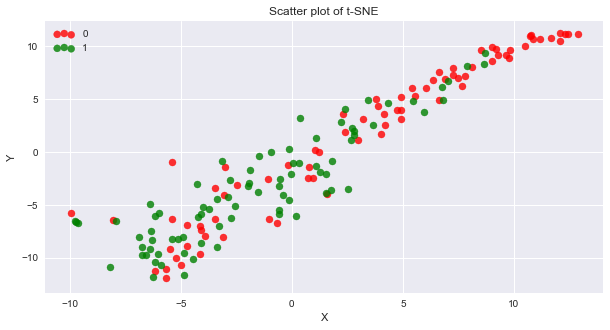

In [38]:
#t-SNE 2d plot for CBE
tp2.tsne_plot_2(CBE_x, CBE_y, 2)


There are 2 unique target valuess in this dataset: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.003s...
[t-SNE] Computed neighbors for 159 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 5558.437550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.939720
[t-SNE] Error after 1000 iterations: 1.457380


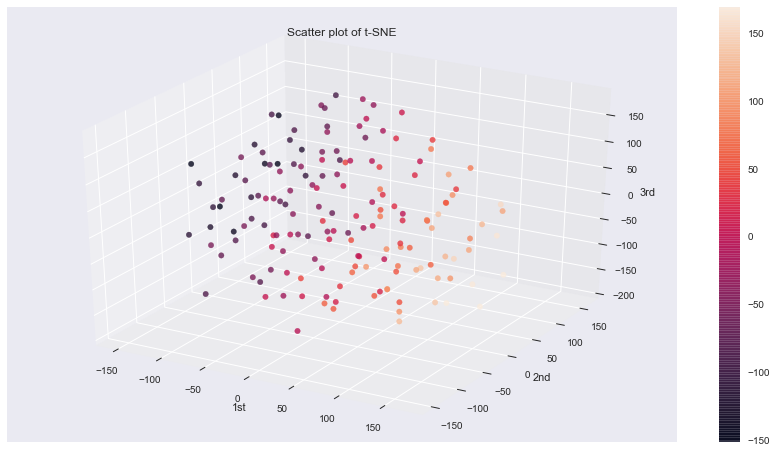

In [39]:
#t-SNE 3d plot for CBE
tp3.tsne_plot_3(CBE_x, CBE_y, 3)


There are 2 unique target valuess: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 160 samples in 0.002s...
[t-SNE] Computed neighbors for 160 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 160 / 160
[t-SNE] Mean sigma: 7369.480579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.693874
[t-SNE] Error after 750 iterations: 0.208396


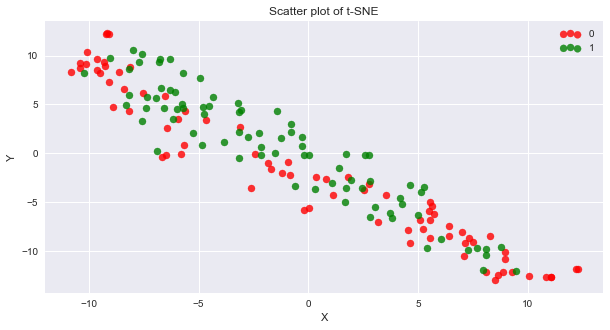

In [40]:
#t-SNE 2d plot for TCX
tp2.tsne_plot_2(TCX_x, TCX_y, 2)


There are 2 unique target valuess in this dataset: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 160 samples in 0.003s...
[t-SNE] Computed neighbors for 160 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 160 / 160
[t-SNE] Mean sigma: 7369.480579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.363785
[t-SNE] Error after 1000 iterations: 1.698971


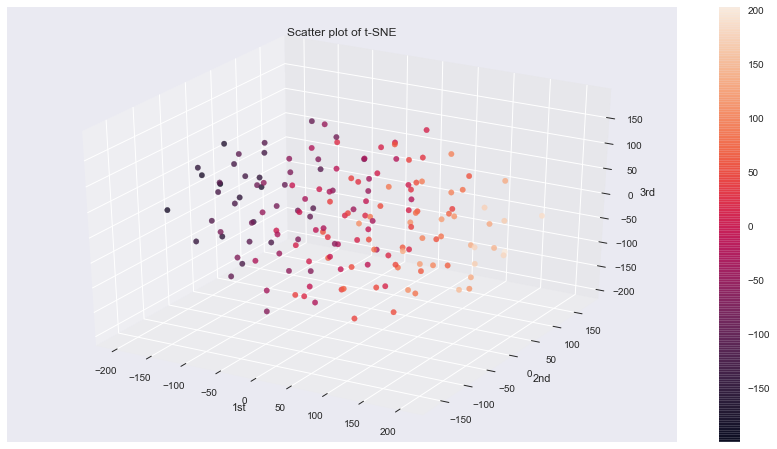

In [41]:
#t-SNE 3d plot for TCX
tp3.tsne_plot_3(TCX_x, TCX_y, 3)


There are 2 unique target valuess: [0 1]
Explained variance: 0.9960
Individual variance contributions:
0.9581131266950367
0.016315996728918557
0.006757396072757164
0.0060281931594912295
0.0033910216811671666
0.0019359085969717312
0.0012869141360898717
0.0008639036545258192
0.0007722664754757632
0.0005713981918076202


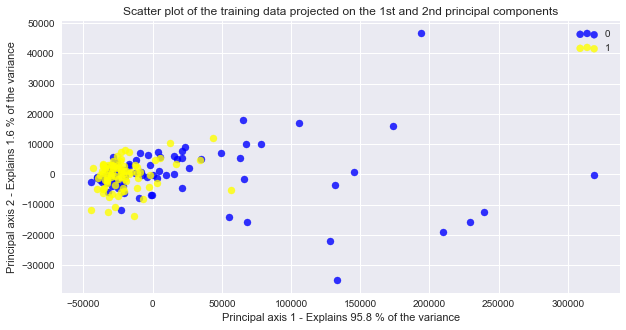

In [42]:
#pca plot for CBE
pp.pca_plot(CBE_x, CBE_y, 10)


There are 2 unique target valuess: [0 1]
Explained variance: 0.9985
Individual variance contributions:
0.9663146214177487
0.013049078657297168
0.010872188662487932
0.0027777421157494098
0.0021191615725225056
0.0012972370307631571
0.0006295689177979057
0.0005652168538922539
0.0004440753483496929
0.0003993521674802368


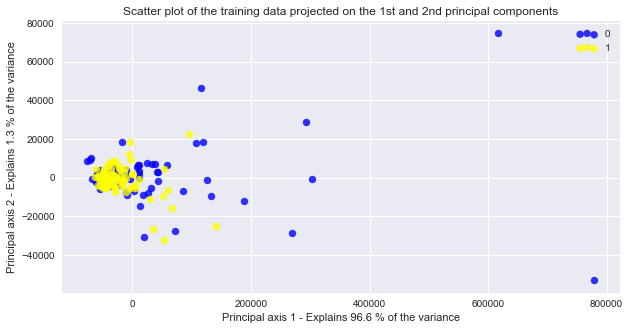

In [43]:
#pca plot for TCX
pp.pca_plot(TCX_x, TCX_y, 10)

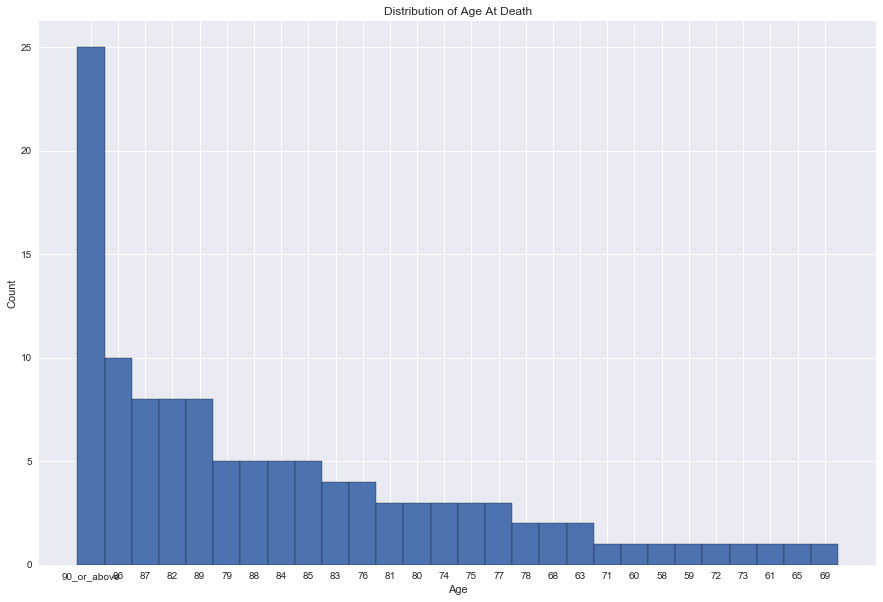

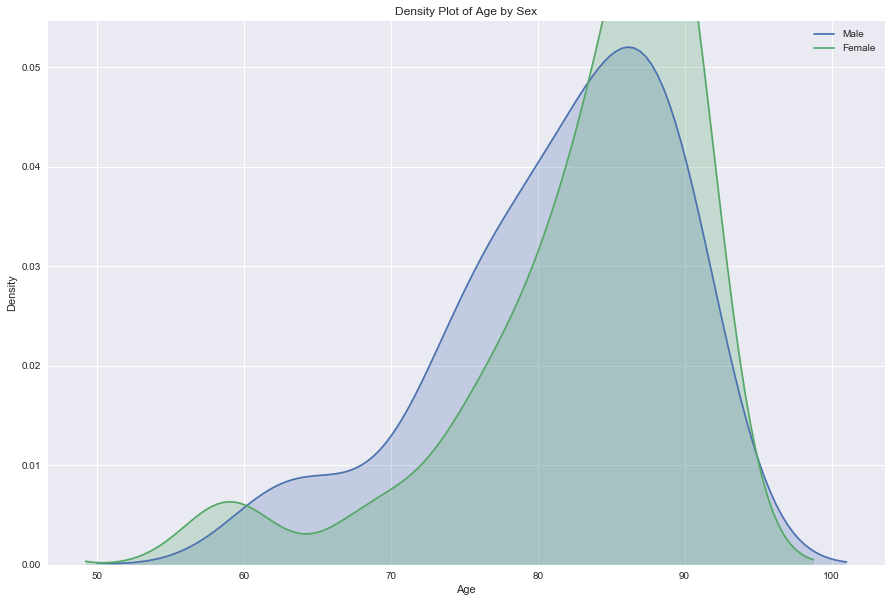

In [75]:
#the distribution plot of age at death and the density plot of gender against age
asp.AgeSex_plot(CBE_covariates)

In [44]:
#select common samples for CBE and TCX data set
finC, finT = aas.amcon_select(CBEanc, TCXanc)
print(finC.shape)
print(finT.shape)

(132, 19950)
(132, 19379)


In [34]:
#prepare data and labels for training for CBE
finC_y = finC['Diagnosis']
finC_y = pd.DataFrame(finC_y)
finC_y = finC_y.astype(int)
finC_x = finC.drop(['Diagnosis'], axis=1)
#prepare data and labels for training for TCX
finT_y = finT['Diagnosis']
finT_y = pd.DataFrame(finT_y)
finT_y = finT_y.astype(int)
finT_x = finT.drop(['Diagnosis'], axis=1)

In [49]:
#evaluation of RFE feature selection along with training LinearSVC under 10-fold cross validation for CBE
acc_CBE = lsfs.linear_svc_fs(CBE_x, CBE_y)

selected num of features:  5
C_best =  [6.95192796] highest accuracy =  [0.80625] std =  [0.28565987]
selected num of features:  10
C_best =  [1.27427499] highest accuracy =  [0.74458333] std =  [0.2470735]
selected num of features:  15
C_best =  [14.38449888] highest accuracy =  [0.83125] std =  [0.14803399]
selected num of features:  20
C_best =  [2.6366509] highest accuracy =  [0.9] std =  [0.09762812]
selected num of features:  30
C_best =  [2.6366509] highest accuracy =  [0.875] std =  [0.10077822]
selected num of features:  50
C_best =  [48.32930239] highest accuracy =  [0.9] std =  [0.10897247]
selected num of features:  75
C_best =  [18.32980711] highest accuracy =  [0.9] std =  [0.08477912]
selected num of features:  100
C_best =  [29.76351442] highest accuracy =  [0.8875] std =  [0.09601432]
selected num of features:  250
C_best =  [ 5.45559478 11.28837892 48.32930239] highest accuracy =  [0.89375 0.89375 0.89375] std =  [0.09291293 0.11541366 0.11541366]
selected num of feat

In [50]:
#evaluation of RFE feature selection along with training LinearSVC under 10-fold cross validation for TCX
acc_TCX = lsfs.linear_svc_fs(TCX_x, TCX_y)

selected num of features:  5
C_best =  [29.76351442] highest accuracy =  [0.8] std =  [0.22672946]
selected num of features:  10
C_best =  [100.] highest accuracy =  [0.83125] std =  [0.19172327]
selected num of features:  15
C_best =  [11.28837892] highest accuracy =  [0.93125] std =  [0.08125]
selected num of features:  20
C_best =  [1.62377674] highest accuracy =  [0.9] std =  [0.08003905]
selected num of features:  30
C_best =  [11.28837892] highest accuracy =  [0.9] std =  [0.09354143]
selected num of features:  50
C_best =  [61.58482111] highest accuracy =  [0.91875] std =  [0.09291293]
selected num of features:  75
C_best =  [61.58482111] highest accuracy =  [0.93125] std =  [0.08592329]
selected num of features:  100
C_best =  [14.38449888 23.35721469] highest accuracy =  [0.925 0.925] std =  [0.0728869  0.06123724]
selected num of features:  250
C_best =  [6.95192796] highest accuracy =  [0.925] std =  [0.0875]
selected num of features:  500
C_best =  [6.95192796] highest accu

In [54]:
#evaluation of RFE feature selection on direct data combination method along with training LinearSVC under 10-fold cross validation
dir_acc = lsd.linear_svc_dir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
C_best =  [ 2.6366509  18.32980711 37.92690191] highest accuracy =  [0.89285714 0.89285714 0.89285714] std =  [0.08587088 0.09250535 0.11003425]
selected num of features:  1000
C_best =  [3.35981829] highest accuracy =  [0.89285714] std =  [0.08587088]
selected num of features:  500
C_best =  [18.32980711] highest accuracy =  [0.88516484] std =  [0.09287015]
selected num of features:  250
C_best =  [3.35981829] highest accuracy =  [0.89285714] std =  [0.11003425]
selected num of features:  100
C_best =  [61.58482111] highest accuracy =  [0.87802198] std =  [0.09904751]
selected num of features:  75
C_best =  [ 2.06913808  3.35981829  4.2813324   5.45559478  6.95192796 18.32980711
 23.35721469 29.76351442 78.47599704] highest accuracy =  [0.87032967 0.87032967 0.87032967 0.87032967 0.87032967 0.87032967
 0.87032967 0.87032967 0.87032967] std =  [0.07704856 0.07704856 0.07704856 0.07704856 0.07704856 0.07704856
 0.07704856 0.07704856 0.07704856]
selected n

In [52]:
#evaluation of RFE feature selection on resampling data combination method along with training LinearSVC under 10-fold cross validation
res_acc = lsr.linear_svc_res(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
C_best =  [ 5.45559478  8.8586679  14.38449888] highest accuracy =  [0.90054945 0.90054945 0.90054945] std =  [0.09149465 0.09149465 0.09149465]
selected num of features:  1000
C_best =  [8.8586679] highest accuracy =  [0.91593407] std =  [0.08743172]
selected num of features:  500
C_best =  [2.6366509] highest accuracy =  [0.91593407] std =  [0.08743172]
selected num of features:  250
C_best =  [29.76351442] highest accuracy =  [0.9467033] std =  [0.04902442]
selected num of features:  100
C_best =  [37.92690191] highest accuracy =  [0.93131868] std =  [0.04135505]
selected num of features:  75
C_best =  [61.58482111] highest accuracy =  [0.93076923] std =  [0.06389711]
selected num of features:  50
C_best =  [100.] highest accuracy =  [0.89340659] std =  [0.06212437]
selected num of features:  30
C_best =  [1.27427499] highest accuracy =  [0.93131868] std =  [0.05379286]
selected num of features:  20
C_best =  [37.92690191] highest accuracy =  [0.93956

In [77]:
#evaluation of t-test feature selection along with training LinearSVC under 10-fold cross validation for CBE
t_acc_CBE = lst.linear_svc_tt(CBE_x, CBE_y)

selected num of features:  5
C_best =  [3.35981829] highest accuracy =  [0.80625] std =  [0.30032534]
selected num of features:  10
C_best =  [37.92690191] highest accuracy =  [0.80625] std =  [0.26582713]
selected num of features:  15
C_best =  [4.2813324] highest accuracy =  [0.71875] std =  [0.35272378]
selected num of features:  20
C_best =  [2.06913808] highest accuracy =  [0.78125] std =  [0.29613394]
selected num of features:  30
C_best =  [2.06913808] highest accuracy =  [0.75666667] std =  [0.30581857]
selected num of features:  50
C_best =  [48.32930239] highest accuracy =  [0.7375] std =  [0.23684119]
selected num of features:  75
C_best =  [100.] highest accuracy =  [0.76875] std =  [0.22715977]
selected num of features:  100
C_best =  [5.45559478] highest accuracy =  [0.86875] std =  [0.16165646]
selected num of features:  250
C_best =  [3.35981829] highest accuracy =  [0.84375] std =  [0.15116733]
selected num of features:  500
C_best =  [61.58482111] highest accuracy =  

In [79]:
#evaluation of t-test feature selection along with training LinearSVC under 10-fold cross validation for TCX
t_acc_TCX = lst.linear_svc_tt(TCX_x, TCX_y)

selected num of features:  5
C_best =  [23.35721469] highest accuracy =  [0.68125] std =  [0.3659854]
selected num of features:  10
C_best =  [14.38449888] highest accuracy =  [0.8] std =  [0.31099638]
selected num of features:  15
C_best =  [29.76351442] highest accuracy =  [0.78125] std =  [0.22229274]
selected num of features:  20
C_best =  [11.28837892] highest accuracy =  [0.8125] std =  [0.1875]
selected num of features:  30
C_best =  [14.38449888] highest accuracy =  [0.8375] std =  [0.15360257]
selected num of features:  50
C_best =  [1.        4.2813324] highest accuracy =  [0.84375 0.84375] std =  [0.17951758 0.14320549]
selected num of features:  75
C_best =  [3.35981829] highest accuracy =  [0.9] std =  [0.14031215]
selected num of features:  100
C_best =  [37.92690191] highest accuracy =  [0.9] std =  [0.08003905]
selected num of features:  250
C_best =  [78.47599704] highest accuracy =  [0.9] std =  [0.09354143]
selected num of features:  500
C_best =  [4.2813324] highest

In [81]:
#evaluation of t-test feature selection on direct data combination method along with training LinearSVC under 10-fold cross validation
t_dir_acc = lstd.linear_svc_tdir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
C_best =  [18.32980711] highest accuracy =  [0.89285714] std =  [0.09250535]
selected num of features:  1000
C_best =  [ 18.32980711 100.        ] highest accuracy =  [0.88516484 0.88516484] std =  [0.11557938 0.12059031]
selected num of features:  500
C_best =  [ 1.         61.58482111] highest accuracy =  [0.87747253 0.87747253] std =  [0.11535976 0.1428582 ]
selected num of features:  250
C_best =  [8.8586679] highest accuracy =  [0.90054945] std =  [0.08478113]
selected num of features:  100
C_best =  [1.        4.2813324] highest accuracy =  [0.88516484 0.88516484] std =  [0.08626374 0.10484144]
selected num of features:  75
C_best =  [14.38449888] highest accuracy =  [0.88516484] std =  [0.07910752]
selected num of features:  50
C_best =  [14.38449888] highest accuracy =  [0.86978022] std =  [0.11967558]
selected num of features:  30
C_best =  [14.38449888] highest accuracy =  [0.87857143] std =  [0.09049936]
selected num of features:  20
C_best = 

In [87]:
#evaluation of t-test feature selection on resampling data combination method along with training LinearSVC under 10-fold cross validation
t_res_acc = lstr.linear_svc_tres(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
C_best =  [8.8586679] highest accuracy =  [0.89285714] std =  [0.11003425]
selected num of features:  1000
C_best =  [18.32980711] highest accuracy =  [0.87747253] std =  [0.08596926]
selected num of features:  500
C_best =  [37.92690191] highest accuracy =  [0.89285714] std =  [0.08587088]
selected num of features:  250
C_best =  [23.35721469] highest accuracy =  [0.89230769] std =  [0.0985096]
selected num of features:  100
C_best =  [61.58482111] highest accuracy =  [0.8467033] std =  [0.10362498]
selected num of features:  75
C_best =  [6.95192796] highest accuracy =  [0.86318681] std =  [0.16076382]
selected num of features:  50
C_best =  [11.28837892] highest accuracy =  [0.90769231] std =  [0.10769231]
selected num of features:  30
C_best =  [1.27427499] highest accuracy =  [0.87747253] std =  [0.15091497]
selected num of features:  20
C_best =  [4.2813324] highest accuracy =  [0.81703297] std =  [0.15031364]
selected num of features:  15
C_best =

In [31]:
#find the feature id by recursively remove less important features until the last one for CBE
svc = LinearSVC()
rfe = RFE(estimator=svc, n_features_to_select=1, step=0.1)
rfe.fit(CBE_x, np.ravel(CBE_y))
ranking = rfe.ranking_
selection = CBE_x.iloc[:,np.where(ranking == 1)[0]]
print(list(selection))

['ENSG00000112139']


In [32]:
#find the feature id by recursively remove less important features until the last one for TCX
svc = LinearSVC()
rfe = RFE(estimator=svc, n_features_to_select=1, step=0.1)
rfe.fit(TCX_x, np.ravel(TCX_y))
ranking = rfe.ranking_
selection = TCX_x.iloc[:,np.where(ranking == 1)[0]]
print(list(selection))

['ENSG00000064393']
